In [1]:
# NB: per eseguire questo notebook come file Python, scegliere il menù "File -> Download as -> Python (.py)" .
# Da Canopy, scommentando questa istruzione si hanno i grafici nella console e non in finestre aggiuntive:
#get_ipython().magic(u'matplotlib inline')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from apprendimento_neurale import *
from nonlinear_LS import *

In [2]:
# apprendimento legge AND:
n_neurons_first_layer = 1
inputs = np.array([[0, 0, 1, 1],[0, 1, 0, 1]])
target = np.array([[0, 0, 0, 1]])
target = (target - 0.5) * 2  # normalizzazione del target specifica per questo problema
toll = 1e-3

W1opt,W2opt,err_pred_hist,target_pred_hist,grad_sqnorm_hist,iter_done = apprendimento_neurale(n_neurons_first_layer,inputs,target,toll,\
                                             maxiter=150000,decim_ris_ratio=1,eta=0.8)

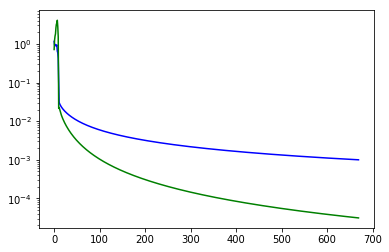

In [3]:
plt.figure(1); plt.semilogy(err_pred_hist[1:iter_done],'b-'); 
plt.semilogy(grad_sqnorm_hist[1:iter_done],'g-'); 

In [4]:
print(np.squeeze(np.array(np.rint(target_pred_hist[:,-1]/2+0.5))))

[0. 0. 0. 1.]


In [9]:
# apprendimento legge XOR:
n_neurons_first_layer = 1
input = np.array([[0, 0, 1, 1],[0, 1, 0, 1]])
target = np.array([[0, 1, 1, 0]])
target = (target - 0.5) * 2  # normalizzazione del target specifica per questo problema
toll = 1e-3
W1,W2,err_pred_hist,target_pred_hist,grad_sqnorm_hist,iter_done = apprendimento_neurale(n_neurons_first_layer,input,\
                                target,toll,maxiter=150000,decim_ris_ratio=1,eta=0.001)

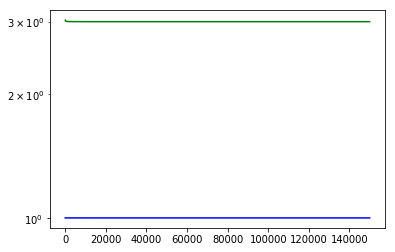

In [10]:
plt.figure(1); plt.semilogy(err_pred_hist[1:],'b-'); plt.semilogy(grad_sqnorm_hist[1:],'g-'); 

In [40]:
# apprendimento legge XOR con più neuroni:
input = np.array([[0, 0, 1, 1],[0, 1, 0, 1]])
target = np.array([[0, 1, 1, 0]])
target = (target - 0.5) * 2  # normalizzazione del target specifica per questo problema
n_layers = 1
n_neurons_first_layer = 5
toll = 1e-3
W1,W2,err_pred_hist,target_pred_hist,grad_sqnorm_hist,iter_done = apprendimento_neurale(n_neurons_first_layer,input,\
                            target,toll,maxiter=10000,decim_ris_ratio=1,eta=0.8,n_layers=n_layers)

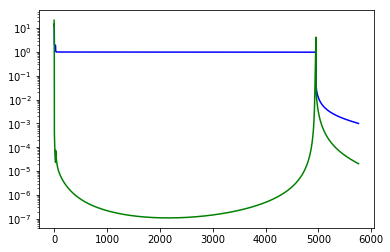

In [41]:
plt.figure(1); plt.semilogy(err_pred_hist[1:iter_done],'b-'); plt.semilogy(grad_sqnorm_hist[1:iter_done],'g-'); 

In [42]:
print(np.squeeze(np.array(np.rint(target_pred_hist[:,-1]/2+0.5))))

[0. 1. 1. 0.]


In [46]:
n_layers = 2
W1,W2,err_pred_hist,target_pred_hist,grad_sqnorm_hist,iter_done = apprendimento_neurale(n_neurons_first_layer,input,\
                            target,toll,maxiter=100000,decim_ris_ratio=1,eta=0.8,n_layers=n_layers)

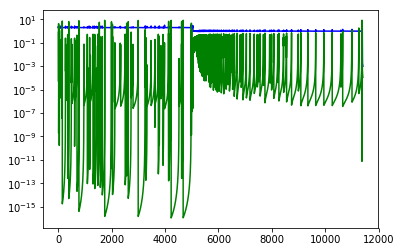

In [47]:
plt.figure(1); plt.semilogy(err_pred_hist[1:iter_done],'b-'); plt.semilogy(grad_sqnorm_hist[1:iter_done],'g-'); 

In [48]:
print(np.squeeze(np.array(np.rint(target_pred_hist[:,-1]/2+0.5))))

[0. 1. 1. 0.]


In [30]:
# approssimazione di una funzione:
h = 0.24
y_veri = np.concatenate((np.sin(np.arange(0.,2.*pi+h,h)), -np.sin(np.arange(0.,2.*pi+h,h))+1.))
maxy = max(y_veri)
miny = min(y_veri)
y_veri = (y_veri - (maxy+miny)/2.) / ((maxy-miny)/1.8) 
print("max(y_veri) = ",np.amax(y_veri),"  ,  min(y_veri) = ",np.min(y_veri))

max(y_veri) =  0.9   ,  min(y_veri) =  -0.9


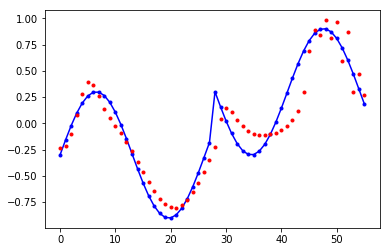

In [35]:
n_neurons_first_layer = 18
toll = 1e-3
inputs = np.atleast_2d(np.arange(len(y_veri)))
target = np.atleast_2d(y_veri)
W1,W2,err_pred_hist,target_pred_hist,grad_sqnorm_hist,iter_done = apprendimento_neurale(n_neurons_first_layer,inputs,\
                            target,toll,maxiter=10000,decim_ris_ratio=100,eta=0.001,n_layers=1)
plt.figure(1); plt.plot(y_veri,'b.-'); plt.plot(target_pred_hist[:,-1],'r.');

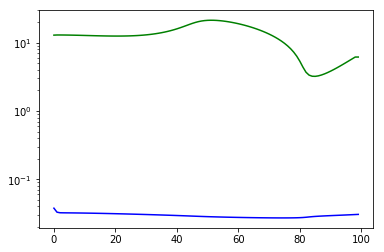

In [36]:
plt.figure(1); plt.semilogy(err_pred_hist[1:],'b-'); plt.semilogy(grad_sqnorm_hist[1:],'g-'); 

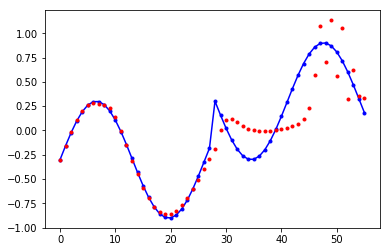

In [37]:
W1,W2,err_pred_hist,target_pred_hist,grad_sqnorm_hist,iter_done = apprendimento_neurale(n_neurons_first_layer,inputs,\
                            target,toll,maxiter=150000,decim_ris_ratio=100,eta=0.001,n_layers=1)
plt.figure(1); plt.plot(y_veri,'b.-'); plt.plot(target_pred_hist[:,-1],'r.');

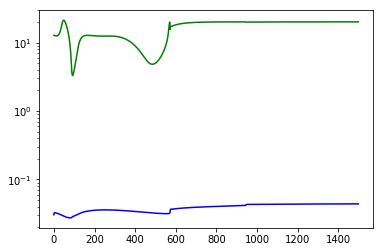

In [38]:
plt.figure(1); plt.semilogy(err_pred_hist[1:],'b-'); plt.semilogy(grad_sqnorm_hist[1:],'g-'); 